In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
orden_columnas = ['llamado_fecha_hora',  
                                   'llamado_provincia', 
                                   'llamante_edad',
                                   'llamante_genero', 
                                   'llamante_vinculo', 
                                   'caso_judicializado',
                                   'hecho_lugar', 
                                   'victima_a_resguardo', 
                                   'victima_edad', 
                                   'victima_genero',
       'victima_nacionalidad', 'victima_vinculo_agresor',
       'victima_discapacidad', 'victima_convive_agresor',
       'vs_violacion_via_vaginal', 'vs_violacion_via_anal',
       'vs_violacion_via_oral', 'vs_tentativa_violacion',
       'vs_tocamiento_sexual', 'vs_intento_tocamiento',
       'vs_Intento_violación_tercera_persona', 'vs_grooming',
       'vs_exhibicionismo', 'vs_amenazas_verbales_contenido_sexual',
       'vs_explotacion_sexual', 'vs_explotacion_sexual_comercial',
       'vs_explotacion_sexual_viajes_turismo',
       'vs_sospecha_trata_personas_fines_sexuales',
       'vs_existencia_facilitador_corrupcion_nnya',
       'vs_obligacion_sacarse_fotos_pornograficas',
       'vs_eyaculacion_partes_cuerpo', 'vs_acoso_sexual',
       'vs_iniciacion_sexual_forzada_inducida',
       'vs_otra_forma_violencia_sexual', 'vs_no_sabe_no_contesta',
       'ofv_sentimiento_amenaza', 'ofv_amenaza_explicita',
       'ofv_violencia_fisica', 'ofv_intento_ahorcar', 'ofv_intento_quemar',
       'ofv_intento_ahogar', 'ofv_amenaza_muerte',
       'ofv_uso_sustancias_psicoactivas', 'ofv_intento_privacion_libertad',
       'ofv_privacion_libertad', 'ofv_uso_arma_blanca', 'ofv_uso_arma_fuego',
       'ofv_enganio_seduccion', 'ofv_intento_matar',
       'ofv_uso_animal_victimizar', 'ofv_grooming', 'ofv_otra_forma_violencia',
       'ofv_no_sabe_no_contesta']


In [7]:
dataset_dir = os.path.join(os.path.dirname(os.path.dirname(os.path.abspath(''))), 'datasets')
#llamados_v2= pd.read_excel(os.path.join(dataset_dir, 'xlsx/llamados_v2.xlsx'), parse_dates=['llamado_fecha_hora'])

data_2017 =pd.read_csv(os.path.join(dataset_dir,'csv/llamados_atendidos_abuso_sexual_2017.csv'),  parse_dates=['llamado_fecha_hora'], engine= 'python')
data_2018 =pd.read_csv(os.path.join(dataset_dir,'csv/llamados_atendidos_abuso_sexual_2018.csv'),  parse_dates=['llamado_fecha_hora'], engine= 'python')
data_2019 =pd.read_csv(os.path.join(dataset_dir,'csv/llamados_atendidos_abuso_sexual_2019.csv'),  parse_dates=['llamado_fecha_hora'], encoding='latin-1')
data_2020 =pd.read_csv(os.path.join(dataset_dir,'csv/llamados_atendidos_abuso_sexual_2020.csv'),  parse_dates=['llamado_fecha_hora'], engine= 'python')
data_2021 =pd.read_csv(os.path.join(dataset_dir,'csv/llamados_atendidos_abuso_sexual_2021.csv'),  parse_dates=['llamado_fecha_hora'], engine= 'python')


## quitar caso_id

data_2019.drop('caso_id',
  axis='columns', inplace=True)
data_2020.drop('caso_id',
  axis='columns', inplace=True)
data_2021.drop('caso_id',
  axis='columns', inplace=True)

## quitar llamado_provincia_indec_id y llamado_provincia_id

data_2017.drop('llamado_provincia_indec_id',
  axis='columns', inplace=True)
data_2018.drop('llamado_provincia_indec_id',
  axis='columns', inplace=True)
data_2019.drop('llamado_provincia_indec_id',
  axis='columns', inplace=True)

data_2020.drop('llamado_provincia_id',
  axis='columns', inplace=True)
data_2021.drop('llamado_provincia_id',
  axis='columns', inplace=True)


# cambios de nombres de columnas

''' 2017 2018 llamante_quien_llama == llamante_vinculo

2017 2018 2019 llamado_provincia_indec_id == llamado_provincia_id'''


data_2017.rename(columns = {'llamante_quien_llama': 'llamante_vinculo', 'llamado_provincia_indec_id': 'llamado_provincia_id'}, inplace = True)
data_2018.rename(columns = {'llamante_quien_llama': 'llamante_vinculo', 'llamado_provincia_indec_id': 'llamado_provincia_id'}, inplace = True)
data_2019.rename(columns = {'llamado_provincia_indec_id': 'llamado_provincia_id'}, inplace = True)


# concateno

llamados = pd.concat([data_2017, data_2018, data_2019, data_2020, data_2021])


################################################################################

# V2 --> normalizaciones y limpieza

# re ordenar columnas

llamados = llamados[orden_columnas]


# valores numéricos: type integer
'''llamante edad as integer y sin datos = NA
victima edad as integer y sin datos = NA
provincia id as integer y sin datos = NA
'''

llamados['victima_edad'] = pd.to_numeric(llamados['victima_edad'], errors='coerce').convert_dtypes()
llamados['llamante_edad'] = pd.to_numeric(llamados['llamante_edad'], errors='coerce').convert_dtypes() 


# Normalizaciones de errores en carga de datos

'''
- en todo el dataset: Ns/Nc = NS/NC
- llamante_edad Sin dato pasar a N/A
- victima_genero N/A -> NS/NC
- llamante género: Masculino = Masculino Trans = Transgénero
- llamante vinculo Vecino = Vecina/o ' Madre' = 'Madre'
- caso judicializado 'NS/NS' = 'NS/NC' 'Sin datos' = 'NS/NC'
- victima_a_resguardo No = NO
- victima_genero Trans = Transgénero
- victima_vinculo_agresor 'Pareja de la vícitma' = 'Pareja de la víctima' 'Pareja ' = 'Pareja de la víctima' Ex pareja = Ex pareja de la víctima
- hecho_lugar Otro(Especificar en observaciones) = Otro
- llamado_provincia: 'Ciudad Autónoma de Buenos Aires' = 'CABA'
- llamado_provincia: 'Santa Fé' = 'Santa Fe' '''


llamados.loc[:, 'llamante_genero'] = llamados['llamante_genero'].replace({' Masculino': 'Masculino', 'Trans': 'Transgénero'})
llamados.loc[:, 'llamante_vinculo'] = llamados['llamante_vinculo'].replace({'Vecino': 'Vecina/o', ' Madre':'Madre'})

llamados.loc[:, 'victima_a_resguardo'] = llamados['victima_a_resguardo'].replace({'No': 'NO'})
llamados.loc[:, 'victima_genero'] = llamados['victima_genero'].replace({'Trans': 'Transgénero'})
llamados.loc[:, 'victima_vinculo_agresor'] = llamados['victima_vinculo_agresor'].replace({'Pareja de la vícitma': 'Pareja de la víctima', 'Pareja ': 'Pareja de la víctima','Pareja': 'Pareja de la víctima', 'Ex pareja': 'Ex pareja de la víctima'})
llamados.loc[:, 'hecho_lugar'] = llamados['hecho_lugar'].replace({'Otro(Especificar en observaciones)': 'Otro'})
llamados.loc[:, 'caso_judicializado'] = llamados['caso_judicializado'].replace({'NS/NS': 'NS/NC', 'Sin datos':'NS/NC'})
llamados.loc[:, 'llamado_provincia'] = llamados['llamado_provincia'].replace({'Ciudad Autónoma de Buenos Aires': 'CABA', 'Santa Fé': 'Santa Fe'})
llamados.replace('Ns/Nc', 'NS/NC', inplace=True)
llamados.loc[:, 'victima_genero'] = llamados['victima_genero'].fillna('NS/NC')

In [15]:
print('filas con edad llamante + 100: ', len(llamados.loc[llamados['llamante_edad'] >= 100, 'llamante_edad'])) 
print('filas con edad llamante -3: ', len(llamados.loc[llamados['llamante_edad'] < 3, 'llamante_edad']))


print('filas con edad victima + 103: ', len(llamados.loc[llamados['victima_edad'] >= 103, 'victima_edad']))
print('filas con edad victima menor a 0: ', len(llamados.loc[llamados['victima_edad'] < 0, 'victima_edad']))


filas con edad llamante + 100:  192
filas con edad llamante -3:  3
filas con edad victima + 103:  101
filas con edad victima menor a 0:  0


In [10]:
llamados.loc[llamados['llamante_edad'] >= 100, 'llamante_edad'].unique()

<IntegerArray>
[999]
Length: 1, dtype: Int64

In [13]:
llamados.loc[llamados['llamante_edad'] < 3, 'llamante_edad'].unique()

<IntegerArray>
[0]
Length: 1, dtype: Int64

In [19]:
llamados.loc[llamados['victima_edad'] >= 103, 'victima_edad'].unique()

<IntegerArray>
[999, 125, 224, 111]
Length: 4, dtype: Int64

In [22]:
len(llamados.loc[llamados['victima_edad'] == 125, 'victima_edad'])

1

In [23]:
dataset_dir = os.path.join(os.path.dirname(os.path.dirname(os.path.abspath(''))), 'datasets')
#llamados_v2= pd.read_excel(os.path.join(dataset_dir, 'xlsx/llamados_v2.xlsx'), parse_dates=['llamado_fecha_hora'])
llamados_v2= pd.read_excel(os.path.join(dataset_dir, 'xlsx/llamados_v2.xlsx'))

In [3]:
llamados_v2.head()


,llamado_fecha_hora,llamado_provincia,llamante_edad,llamante_genero,llamante_vinculo,caso_judicializado,hecho_lugar,victima_a_resguardo,victima_edad,victima_genero,...,ofv_intento_privacion_libertad,ofv_privacion_libertad,ofv_uso_arma_blanca,ofv_uso_arma_fuego,ofv_enganio_seduccion,ofv_intento_matar,ofv_uso_animal_victimizar,ofv_grooming,ofv_otra_forma_violencia,ofv_no_sabe_no_contesta
0,2016-11-19 12:46:38,Misiones,30.0,Femenino,Hospital,NS/NC,Vivienda de la Víctima,SI,12.0,Femenino,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
1,2016-11-19 13:46:24,CABA,NaN,Femenino,Madre,NS/NC,Vivienda de la Víctima,SI,11.0,Masculino,...,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO
2,2016-11-19 18:20:08,Tucumán,47.0,Femenino,Víctima,NS/NC,Vivienda de la Víctima,SI,47.0,Femenino,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
3,2016-11-20 00:05:55,Santa Fe,NaN,Masculino,Vecina/o,NS/NC,Vivienda de la Víctima,NO,11.0,Femenino,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
4,2016-11-20 00:05:55,Santa Fe,NaN,Masculino,Vecina/o,NS/NC,Vivienda de la Víctima,NO,12.0,Femenino,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO


### Faltantes por columna

In [ ]:
llamados_v2.isnull().sum()

### Descripciones

In [5]:
llamados_v2.describe(include=[object])

,llamado_provincia,llamante_genero,llamante_vinculo,caso_judicializado,hecho_lugar,victima_a_resguardo,victima_genero,victima_nacionalidad,victima_vinculo_agresor,victima_discapacidad,...,ofv_intento_privacion_libertad,ofv_privacion_libertad,ofv_uso_arma_blanca,ofv_uso_arma_fuego,ofv_enganio_seduccion,ofv_intento_matar,ofv_uso_animal_victimizar,ofv_grooming,ofv_otra_forma_violencia,ofv_no_sabe_no_contesta
count,19143,19143,19143,19143,19143,19143,19143,19143,19143,19143,...,19143,19143,19143,19143,19143,19143,19143,19143,19143,19143
unique,25,4,16,3,17,2,4,9,15,3,...,2,2,2,2,2,2,2,2,2,2
top,CABA,Femenino,Comisaría,NO,NS/NC,SI,Femenino,Argentina,"Conocido no familiar (Amigo, vecino, entre otros)",NS/NC,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI
freq,7083,13130,4769,8950,5675,17840,14869,15475,3790,10297,...,19106,19051,19112,19120,18880,19141,19137,18835,17802,10932


In [7]:
llamados_v2.describe(exclude=[object])

,llamado_fecha_hora,llamante_edad,victima_edad
count,19143,10563.000000,17263.000000
mean,2019-08-04 12:53:58.129760256,36.250118,17.167294
min,2016-11-19 12:46:38,3.000000,0.000000
25%,2018-09-17 14:03:04.500000,29.000000,10.000000
50%,2019-08-26 17:15:00,35.000000,14.000000
75%,2020-09-25 18:25:00,42.000000,21.000000
max,2021-07-31 23:45:00,99.000000,99.000000
std,NaN,11.417725,11.910669


### Llamados por provincia

<function matplotlib.pyplot.show(close=None, block=None)>

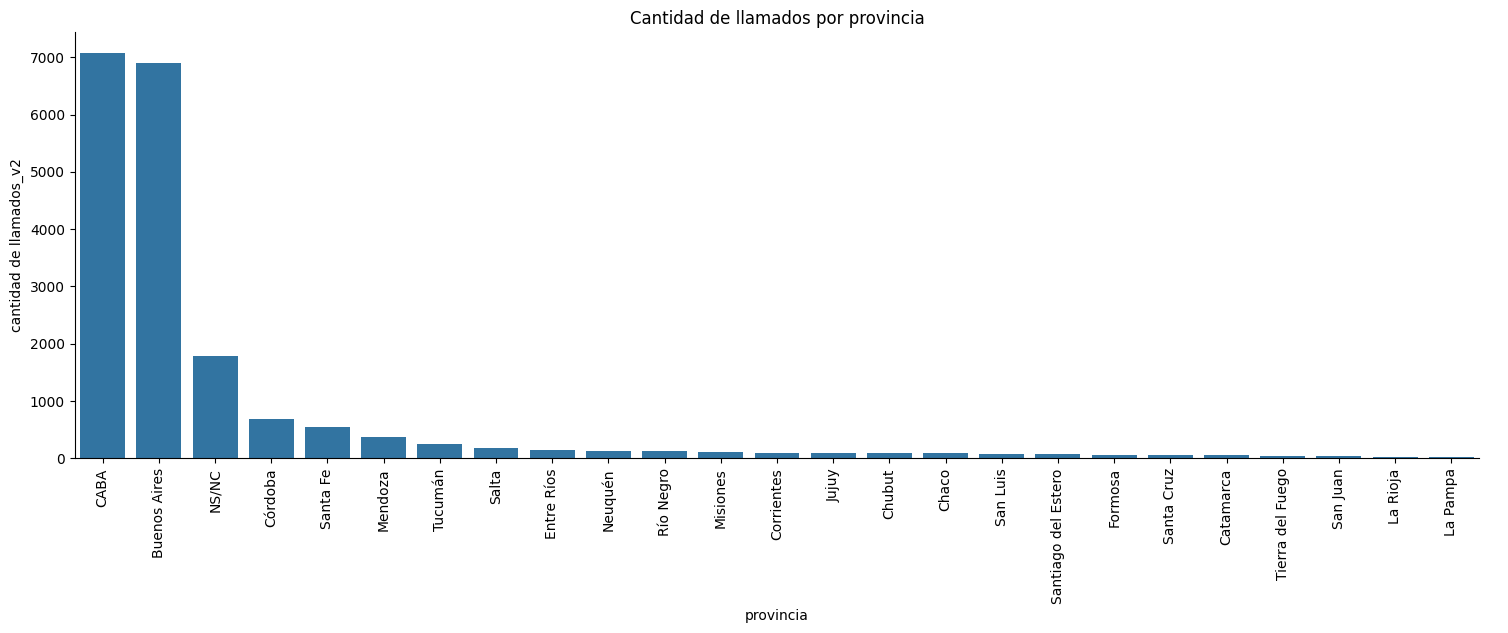

In [12]:
plot_provincia = sns.catplot(x="llamado_provincia", kind="count", data=llamados_v2, height= 5, aspect = 3, order=llamados_v2.llamado_provincia.value_counts().index)
plot_provincia.set(xlabel='provincia', ylabel='cantidad de llamados_v2')
plt.title("Cantidad de llamados por provincia") 
plt.xticks(rotation=90)
plt.show

In [28]:
povincia_counts = llamados_v2['llamado_provincia'].value_counts(normalize=True)*100
povincia_counts

llamado_provincia
CABA                   37.000470
Buenos Aires           36.023612
NS/NC                   9.366348
Córdoba                 3.625346
Santa Fe                2.846994
Mendoza                 1.906702
Tucumán                 1.274617
Salta                   0.898501
Entre Ríos              0.773129
Neuquén                 0.679099
Río Negro               0.642533
Misiones                0.548503
Corrientes              0.517160
Jujuy                   0.517160
Chubut                  0.454474
Chaco                   0.449250
San Luis                0.417907
Santiago del Estero     0.397012
Formosa                 0.339550
Santa Cruz              0.297759
Catamarca               0.292535
Tierra del Fuego        0.250744
San Juan                0.229849
La Rioja                0.167163
La Pampa                0.083581
Name: proportion, dtype: float64

### Cantidad de denuncias por género

<function matplotlib.pyplot.show(close=None, block=None)>

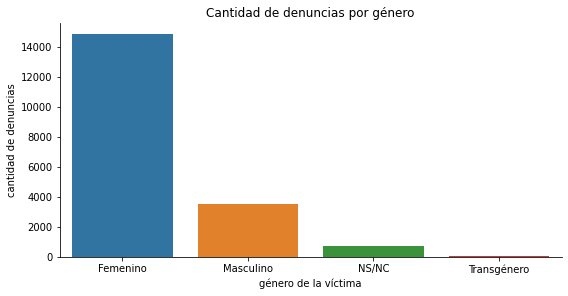

In [65]:
plot_genero = sns.catplot(x="victima_genero", kind="count", data=llamados_V2, height= 4, aspect = 2, order=llamados_V2.victima_genero.value_counts().index)
plot_genero.set(xlabel='género de la víctima', ylabel='cantidad de denuncias')
plt.title("Cantidad de denuncias por género") 
plt.show

### Vínculos agresor-víctima

<function matplotlib.pyplot.show(close=None, block=None)>

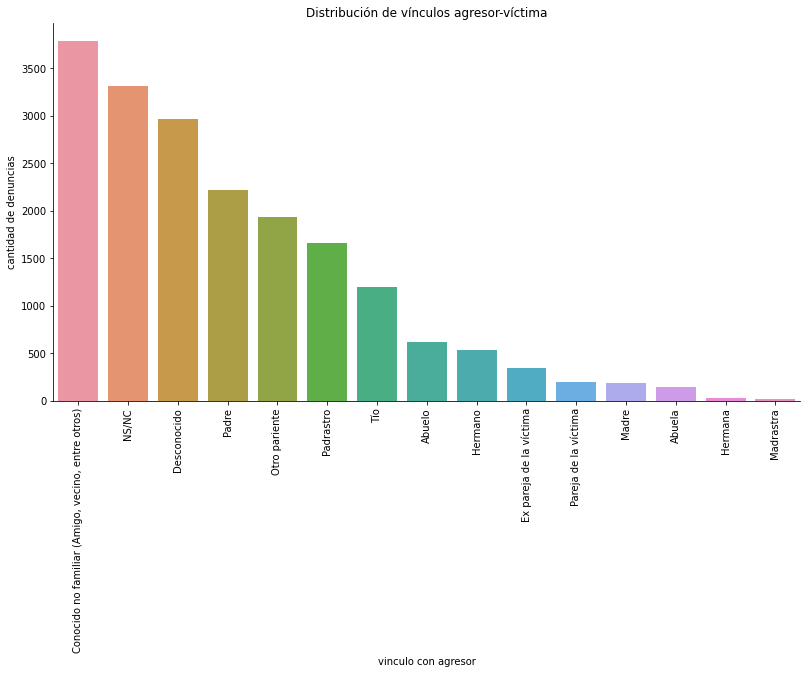

In [64]:
plot_vinculo_agresor= sns.catplot(x="victima_vinculo_agresor", kind="count", data=llamados_v2, height=6, aspect=2, order=llamados_v2.victima_vinculo_agresor.value_counts().index)
plot_vinculo_agresor.set(xlabel='vinculo con agresor', ylabel='cantidad de denuncias')
plt.title("Distribución de vínculos agresor-víctima") 
plt.xticks(rotation=90)
plt.show

In [25]:
vinculo_agresor_counts = llamados_v2['victima_vinculo_agresor'].value_counts(normalize=True)*100
vinculo_agresor_counts

victima_vinculo_agresor
Conocido no familiar (Amigo, vecino, entre otros)    19.798360
NS/NC                                                17.280468
Desconocido                                          15.457347
Padre                                                11.591705
Otro pariente                                        10.097686
Padrastro                                             8.661129
Tío                                                   6.263386
Abuelo                                                3.238782
Hermano                                               2.779084
Ex pareja de la víctima                               1.791778
Pareja de la víctima                                  1.044768
Madre                                                 0.976858
Abuela                                                0.762681
Hermana                                               0.151491
Madrastra                                             0.104477
Name: proportion, dtype: float6

### Vínculos denunciante-víctima

<function matplotlib.pyplot.show(close=None, block=None)>

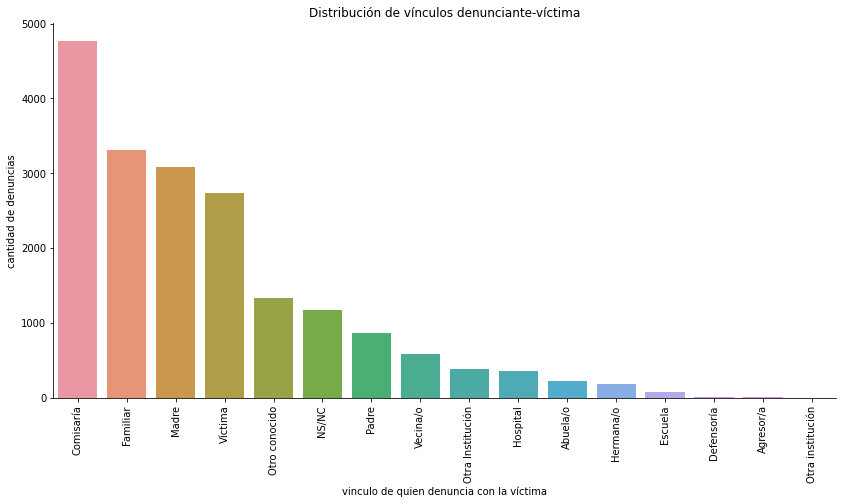

In [63]:
plot_vinculo_llamante = sns.catplot(x="llamante_vinculo", kind="count", data=llamados_v2, height=6, aspect=2, order=llamados_v2.llamante_vinculo.value_counts().index)
plot_vinculo_llamante.set(xlabel='vinculo de quien denuncia con la víctima', ylabel='cantidad de denuncias')
plt.title("Distribución de vínculos denunciante-víctima") 
plt.xticks(rotation=90)
plt.show

In [27]:
llamante_vinculo_counts = round(llamados_v2['llamante_vinculo'].value_counts(normalize=True)*100,2)
llamante_vinculo_counts

llamante_vinculo
Comisaría           24.91
Familiar            17.28
Madre               16.09
Víctima             14.28
Otro conocido        6.95
NS/NC                6.17
Padre                4.54
Vecina/o             3.05
Otra Institución     2.00
Hospital             1.86
Abuela/o             1.20
Hermana/o            1.01
Escuela              0.42
Defensoría           0.10
Agresor/a            0.09
Otra institución     0.04
Name: proportion, dtype: float64

### Lugares de los hechos

<function matplotlib.pyplot.show(close=None, block=None)>

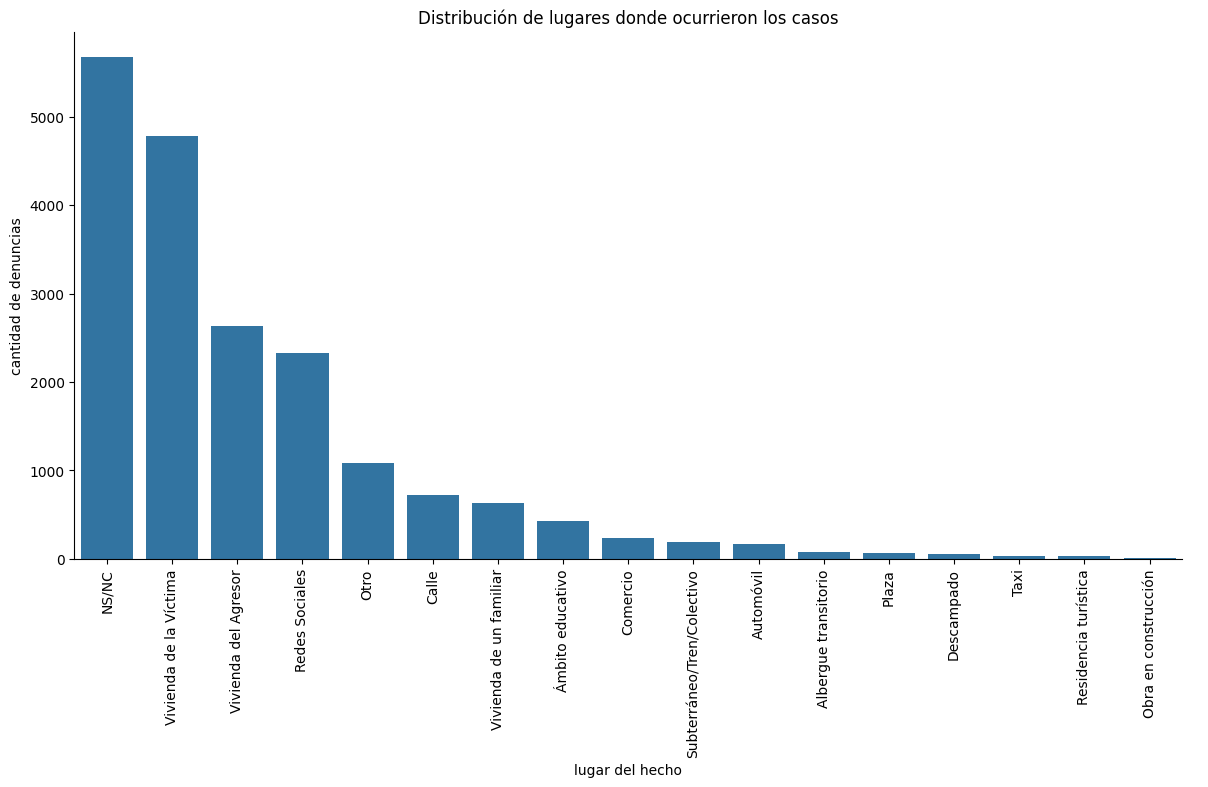

In [8]:
plot_lugar = sns.catplot(x="hecho_lugar", kind="count", data=llamados_v2, height=6, aspect=2, order=llamados_v2.hecho_lugar.value_counts().index)
plot_lugar.set(xlabel= 'lugar del hecho', ylabel='cantidad de denuncias')
plt.title("Distribución de lugares donde ocurrieron los casos") 
plt.xticks(rotation=90)
plt.show

In [24]:
hecho_lugar_counts = llamados_v2['hecho_lugar'].value_counts(normalize=True)*100
hecho_lugar_counts



hecho_lugar
NS/NC                         29.645301
Vivienda de la Víctima        25.006530
Vivienda del Agresor          13.764823
Redes Sociales                12.166327
Otro                           5.667868
Calle                          3.745494
Vivienda de un familiar        3.275349
Ámbito educativo               2.225357
Comercio                       1.248498
Subterráneo/Tren/Colectivo     0.982082
Automóvil                      0.893277
Albergue transitorio           0.397012
Plaza                          0.334326
Descampado                     0.282087
Taxi                           0.151491
Residencia turística           0.146268
Obra en construcción           0.067910
Name: proportion, dtype: float64

### Convivencia víctimas - agresor

<function matplotlib.pyplot.show(close=None, block=None)>

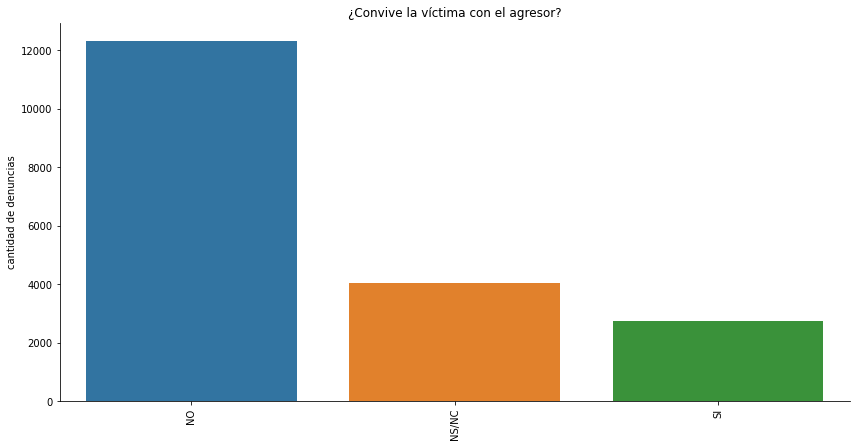

In [58]:
plot_convive = sns.catplot(x="victima_convive_agresor", kind="count", data=llamados_v2, height=6, aspect=2)
plot_convive.set(xlabel= '', ylabel='cantidad de denuncias')
plt.title("¿Convive la víctima con el agresor?") 
plt.xticks(rotation=90)
plt.show

### Existencia de discapacidad en la víctimas

<function matplotlib.pyplot.show(close=None, block=None)>

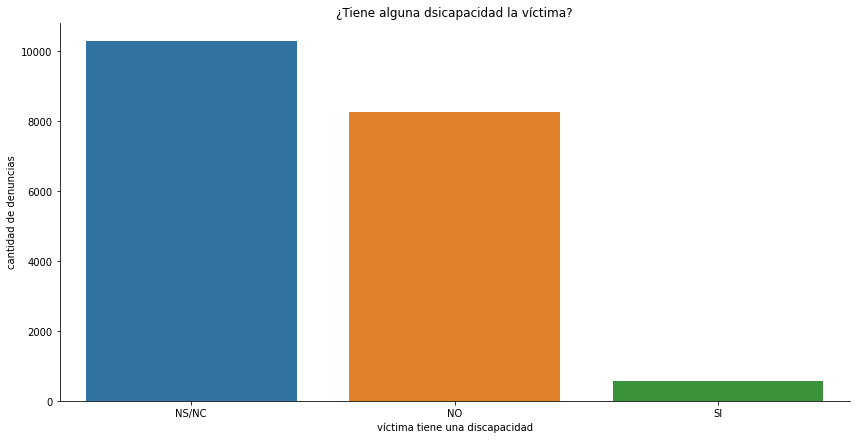

In [91]:
plot_discapacidad = sns.catplot(x="victima_discapacidad", kind="count", data=llamados_v2, height=6, aspect=2,  order=llamados_v2.victima_discapacidad.value_counts().index)
plot_discapacidad.set(xlabel= 'víctima tiene una discapacidad', ylabel='cantidad de denuncias')
plt.title("¿Tiene alguna dsicapacidad la víctima?") 
plt.xticks(rotation=0)
plt.show

### Nacionalidad víctima

<function matplotlib.pyplot.show(close=None, block=None)>

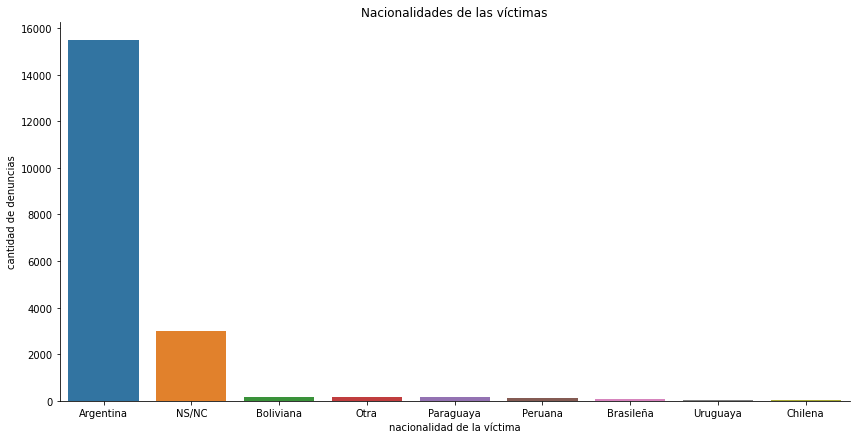

In [124]:
plot_nacionalidad = sns.catplot(x='victima_nacionalidad', kind="count", data=llamados_v2, height=6, aspect=2,  order=llamados_v2.victima_nacionalidad.value_counts().index)
plot_nacionalidad.set(xlabel= 'nacionalidad de la víctima', ylabel='cantidad de denuncias')
plt.title("Nacionalidades de las víctimas") 
plt.xticks(rotation=0)
plt.show

### Numéricos

### Edad

In [131]:
cols_numericas = llamados_v2.iloc[:, 1:5]


In [142]:
%%capture
llamados_v2.drop(['llamado_provincia_id'], axis=1, inplace=True)

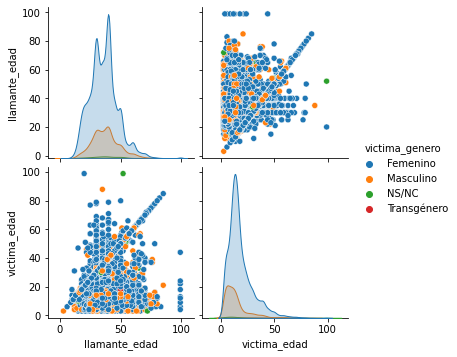

In [189]:
g = sns.pairplot(llamados_v2, hue="victima_genero")

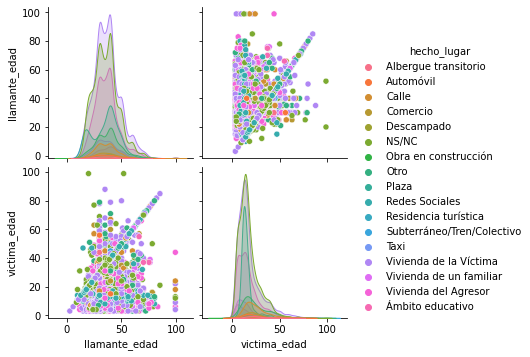

In [190]:
g = sns.pairplot(llamados_v2, hue="hecho_lugar")

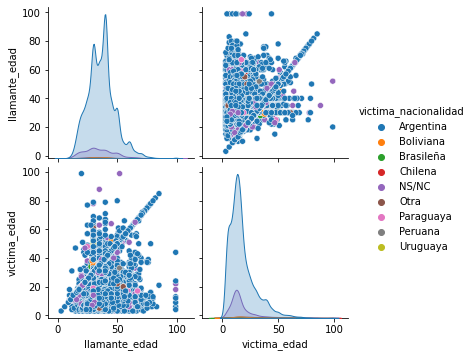

In [191]:
g = sns.pairplot(llamados_v2, hue="victima_nacionalidad")

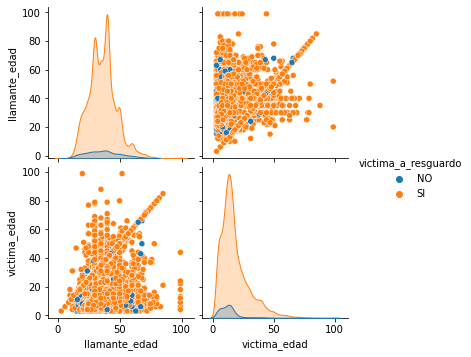

In [192]:
g = sns.pairplot(llamados_v2, hue="victima_a_resguardo")

### Construcción de variables

In [33]:
#lista_noa = ['Jujuy', 'Salta', 'Tucumán', 'Catamarca', 'La Rioja', 'Santiago del Estero']
#lista_noe=['Formosa', 'Chaco', 'Corrientes', 'Misiones']
lista_norte=['Jujuy', 'Salta', 'Tucumán', 'Catamarca', 'La Rioja', 'Santiago del Estero','Formosa', 'Chaco', 'Corrientes', 'Misiones']
#lista_cuyo=['San Luis', 'San Juan', 'Mendoza']
#lista_pampeana=['Córdoba', 'Entre Ríos','La Pampa', 'Santa Fe']
lista_centro = ['San Luis', 'San Juan', 'Mendoza','Córdoba', 'Entre Ríos','La Pampa', 'Santa Fe']
lista_patagonia=['Chubut', 'Neuquén', 'Río Negro', 'Santa Cruz', 'Tierra del Fuego']

def provincias_red(x):
    if x == 'NS/NC':
        return x
    elif x == 'CABA':
        return x
    elif x=='Buenos Aires':
        return x
    elif x in lista_norte:
        return 'Región Norte'
    elif x in lista_centro:
        return 'Región Central'
    elif x in lista_patagonia:
        return 'Región Patagónica'
    else:
        return 'N/A'

llamados_v2['llamado_provincia_red'] = \
    llamados_v2.llamado_provincia.apply(provincias_red)

<function matplotlib.pyplot.show(close=None, block=None)>

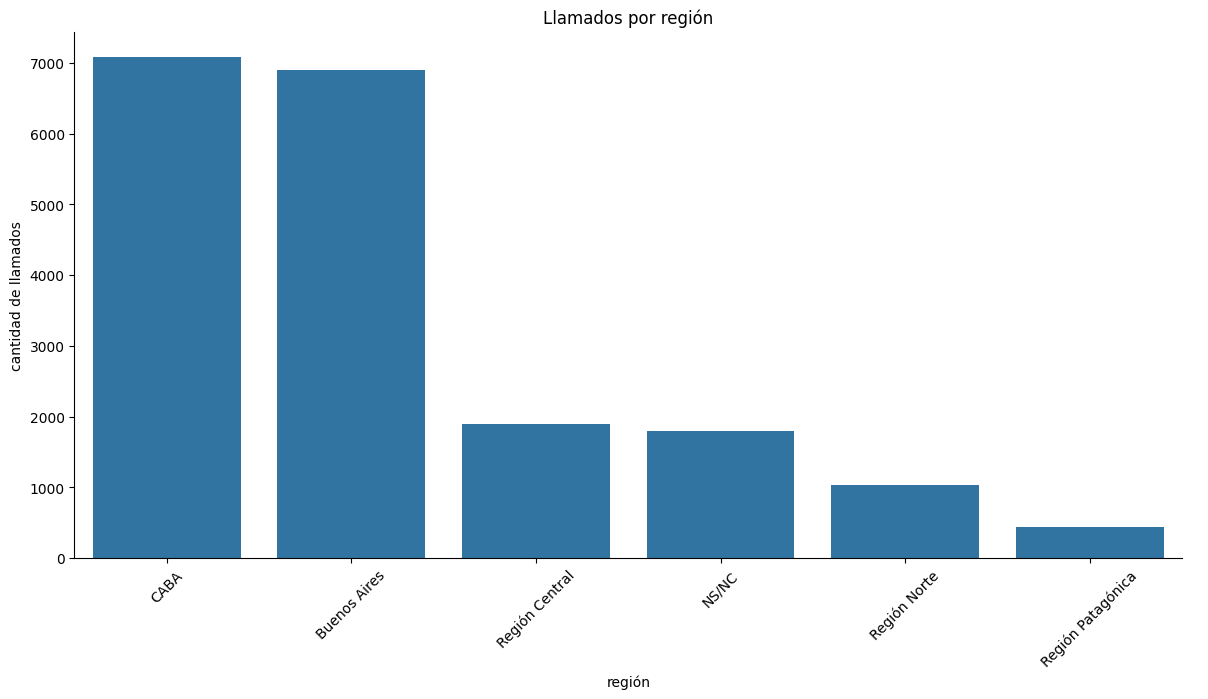

In [34]:
plot_genero_agresor = sns.catplot(x="llamado_provincia_red", kind="count", data=llamados_v2, height=6, aspect=2, order=llamados_v2.llamado_provincia_red.value_counts().index)
plot_genero_agresor.set(xlabel='región', ylabel='cantidad de llamados')
plt.title("Llamados por región") 
plt.xticks(rotation=45)
plt.show

### Género agresor

In [26]:
# género dell agresor
lista_hombre = [ 'Abuelo', 'Hermano', 'Padrastro', 'Padre', 'Tío' ]
lista_mujer = [ 'Abuela','Hermana','Madrastra', 'Madre']
lista_no_especificado_pareja_ex = ['Ex pareja de la víctima','Pareja de la víctima']
lista_no_especificado_familiar_conocido= [ 'Otro pariente','Conocido no familiar (Amigo, vecino, entre otros)']
lista_no_especificado_desconocido = [ 'Desconocido']

def columna_genero_agresor (x):
    if x in lista_mujer:
        return 'Femenino'
    elif x in lista_hombre:
        return 'Masculino'
    elif x in lista_no_especificado_pareja_ex:
        return 'No especificado - agresor pareja/ex pareja'
    elif x in lista_no_especificado_familiar_conocido:
        return 'No especificado - agresor conocido'
    elif x in lista_no_especificado_desconocido:
        return 'No especificado - agresor desconocido'
    elif x == 'NS/NC':
        return x
    else:
        return 'N/A'

In [27]:
llamados_v2['genero_agresor'] = \
    llamados_v2.victima_vinculo_agresor.apply(columna_genero_agresor)

### Género del agresor

<function matplotlib.pyplot.show(close=None, block=None)>

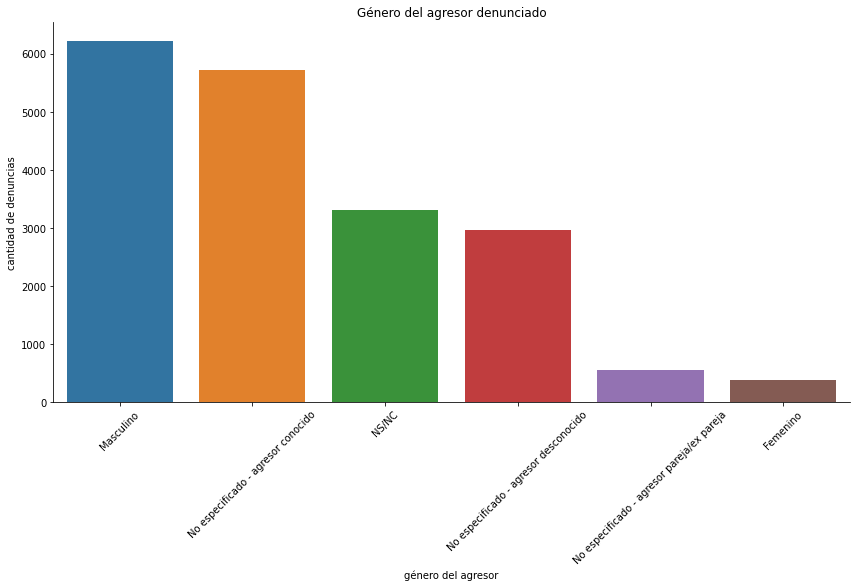

In [102]:
plot_genero_agresor = sns.catplot(x="genero_agresor", kind="count", data=llamados_v2, height=6, aspect=2, order=llamados_v2.genero_agresor.value_counts().index)
plot_genero_agresor.set(xlabel='género del agresor', ylabel='cantidad de denuncias')
plt.title("Género del agresor denunciado") 
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

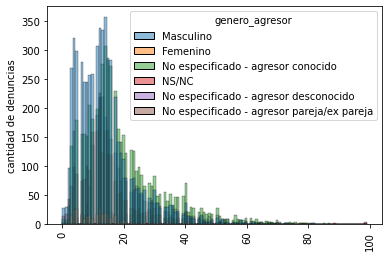

In [28]:
plot_edad = sns.histplot(x="victima_edad", data=llamados_v2, hue='genero_agresor')
plot_edad.set(xlabel= '', ylabel='cantidad de denuncias')
plt.title("") 
plt.xticks(rotation=90)
plt.show

### Familiar/No familiar

In [53]:
lista_familiar = ['Abuela', 'Abuelo', 'Hermana', 'Hermano', 'Madrastra', 'Madre', 'Otro pariente', 'Padrastro', 'Padre', 'Tío' ]
lista_no_familiar = ['Desconocido', 'Conocido no familiar (Amigo, vecino, entre otros)']
lista_pareja_exp = ['Pareja de la víctima', 'Ex pareja de la víctima']

def columna_fam_nofam (x):
    if x in lista_familiar:
        return 'Familiar'
    elif x in lista_no_familiar:
        return 'No Familiar'
    elif x in lista_pareja_exp:
        return 'Pareja/Ex'
    elif x == 'NS/NC':
        return x
    else:
        return 'N/A'

In [54]:
llamados_v2['agresor_fam_no_fam'] = \
    llamados_v2.victima_vinculo_agresor.apply(columna_fam_nofam)

### Vínculos agresor - víctima

<function matplotlib.pyplot.show(close=None, block=None)>

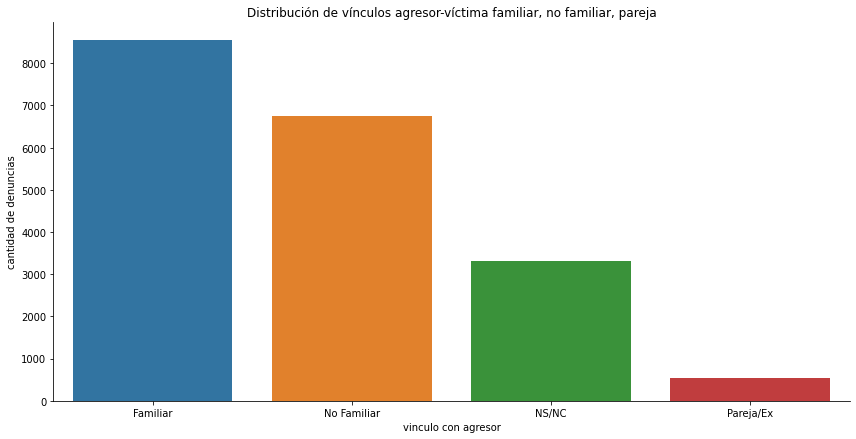

In [101]:
plot_vinculo_agr = sns.catplot(x="agresor_fam_no_fam", kind="count", data=llamados_v2, height=6, aspect=2)
plot_vinculo_agr.set(xlabel='vinculo con agresor', ylabel='cantidad de denuncias')
plt.title("Distribución de vínculos agresor-víctima familiar, no familiar, pareja") 
plt.xticks(rotation=0)
plt.show

In [97]:
lista_conocido = ['Abuela', 'Abuelo','Pareja de la víctima', 'Ex pareja de la víctima', 'Conocido no familiar (Amigo, vecino, entre otros)', 'Hermana', 'Hermano', 'Madrastra', 'Madre', 'Otro pariente', 'Padrastro', 'Padre', 'Tío' ]
lista_no_conocido = ['Desconocido', ]
lista_no_declarado = ['NS/NC']

def columna_conocido_no_conocido (x):
    if x in lista_conocido:
        return 'Agresor conocido por víctima'
    elif x in lista_no_conocido:
        return 'Agresor no conocido por víctima'
    elif x in lista_no_declarado:
        return 'NS/NC'
    else:
        return 'N/A'

llamados_v2['agresor_conocido_no_conocido'] = \
    llamados_v2.victima_vinculo_agresor.apply(columna_conocido_no_conocido)

### Conocimiento o no del agresor

<function matplotlib.pyplot.show(close=None, block=None)>

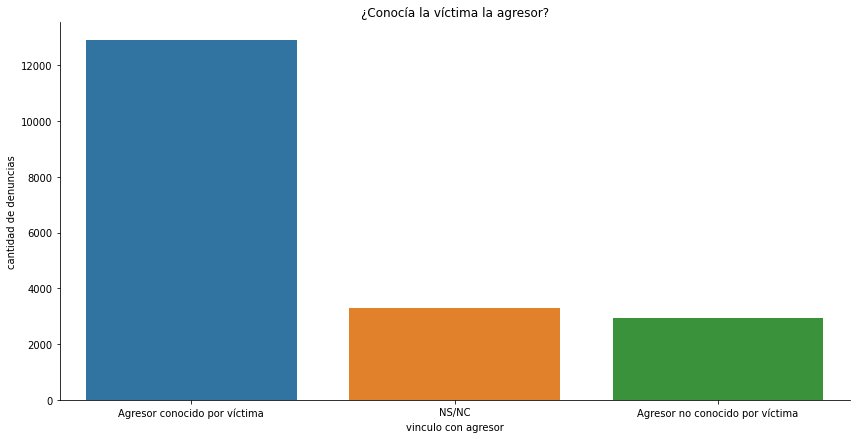

In [100]:
plot_conoc_agresor = sns.catplot(x="agresor_conocido_no_conocido", kind="count", data=llamados_v2, height=6, aspect=2)
plot_conoc_agresor.set(xlabel='vinculo con agresor', ylabel='cantidad de denuncias')
plt.title("¿Conocía la víctima la agresor?") 
plt.xticks(rotation=0)
plt.show